# Die Iris-Datenbank

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.set_cmap('prism');
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0);

<Figure size 800x600 with 0 Axes>

# Die Iris-Datenbank

Die __Iris-Datenbank__ ist eines der bekanntesten und beliebtesten Beispiele für den Einsatz von KI im Bereich der __Klassifizierung__. Der Iris-Datensatz besteht aus insgesamt 150 Datenzeilen mit jeweils vier Einträgen (__Features__) für die Breite und Höhe (in cm) zweier Blätter der Iris-Blüten. Die 150 Datenzeilen sind dabei in drei Gruppen (__Klassen__) zu je 50 Beispielen aufgeteilt:

* Iris setosa
* Iris virginica
* Iris versicolor

___

Vermessen wurden jeweils Länge und Breite des **Kronblatts (Petal)** und **Kelchblatts (Sepal)**.

![Iris-Blüten](IrisBlueten.png)
___

### Mathematische Beschreibung

Codieren wir den Namen der Pflanzen durch die Ziffern 0, 1, 2 so erhalten wir eine Abbildung $F: \mathbb{R}^4 \rightarrow \{0, 1, 2\} \subset \mathbb{R}$
 Unsere Parametermenge ist also vierdimensional (vier __Features__), und die Werte liegen in der Menge {0, 1 ,2}.

### Die Iris-Datenbank in sklearn


`sklearn` stellt den Iris-Datensatz direkt zur Verfügung. Wir laden ihn und sehen uns die Informationen dazu an:

In [13]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Die Testdaten und Labels

Die Daten und Labels (= Targets) erhalten wir über die entsprechenden Attribute. Dabei liegen die Daten in einem `DataFrame` vor, der auch die Metadaten enthält. Die Werte für das __Target__ y laufen von 0 bis 2.

In [14]:
iris_df = iris.data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualisierung



Da die Messdaten vierdimensional sind, ist eine vollständige Visualisierung nicht möglich. 

Es lassen sich in einer zweidimensionalen Darstellung jeweils zwei der vier Größen gegeneinander auftragen. Die drei Klassen werden dabei durch Einfärbung der Punkte gekennzeichnet. Es gibt insgesamt sechs verschiedene Kombinationen:

In [7]:
def plot_bunch(bunch,ax1, ax2):
    X = bunch.data.to_numpy()
    y = bunch.target.values
    scatter = plt.scatter(X[:, ax1], X[:, ax2], c = y)
    plt.xlabel(bunch.feature_names[ax1])
    plt.ylabel(bunch.feature_names[ax2])
    plt.legend(scatter.legend_elements()[0], 
               [name.title() for name in bunch.target_names], loc="lower right", title="Klassen" )

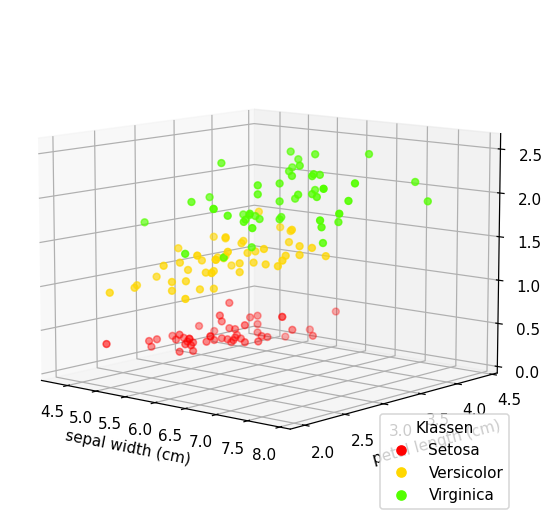

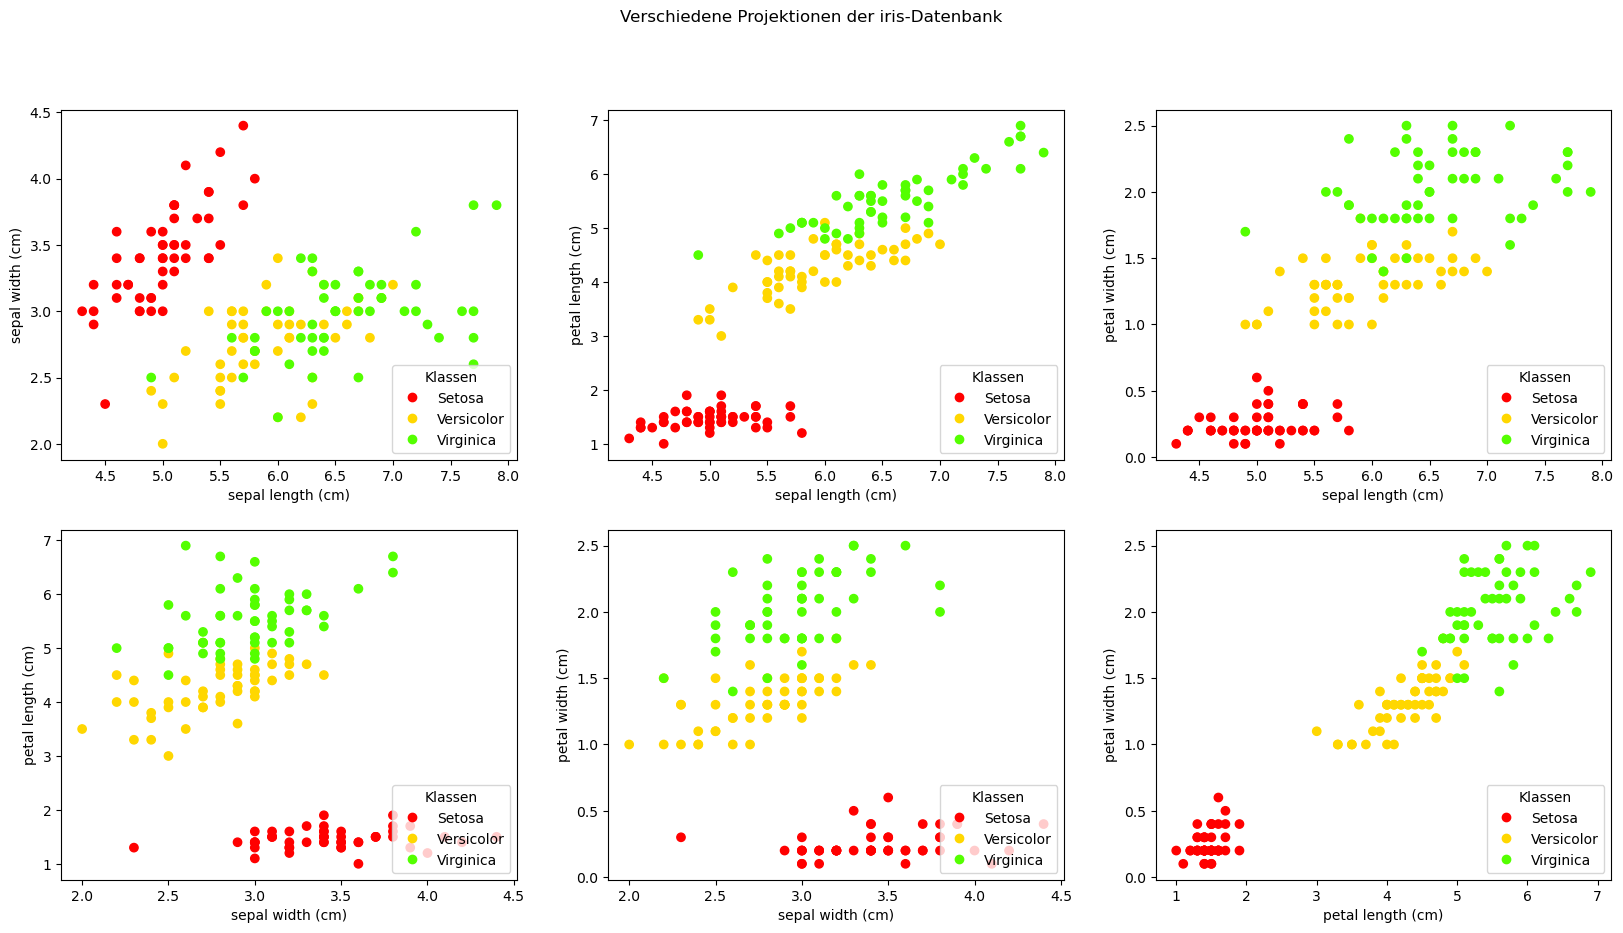

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(20, 10))
fig.suptitle("Verschiedene Projektionen der iris-Datenbank", fontsize = 'large')
from itertools import combinations

for n, a in enumerate([ a for a in combinations(range(4),2) ]):
    plt.subplot(2,3, n+1)
    plot_bunch(iris, *a)

## Visualisierung in 3D

Mit `matplotlib` sind auch 3D-Visualisierungen möglich, die man mit `ipympl` sogar interaktiv gestalten kann. Hiermit können drei der vier Parameter gegeneinander aufgetragen werden. Man kann so schon mögliche __Cluster__ erkennen:

In [10]:
def plot_bunch3d(bunch,ax1, ax2,ax3):
    X = bunch.data.to_numpy()
    y = bunch.target.values
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(bunch.feature_names[ax1])
    ax.set_ylabel(bunch.feature_names[ax2])
    ax.set_zlabel(bunch.feature_names[ax3])
    scatter = ax.scatter(X[:,0], X[:,1], X[:,3],c = y)
    #plt.style.use('_mpl-gallery')
    ax.legend(scatter.legend_elements()[0], [name.title() for name in bunch.target_names], loc="lower right", title="Klassen" )


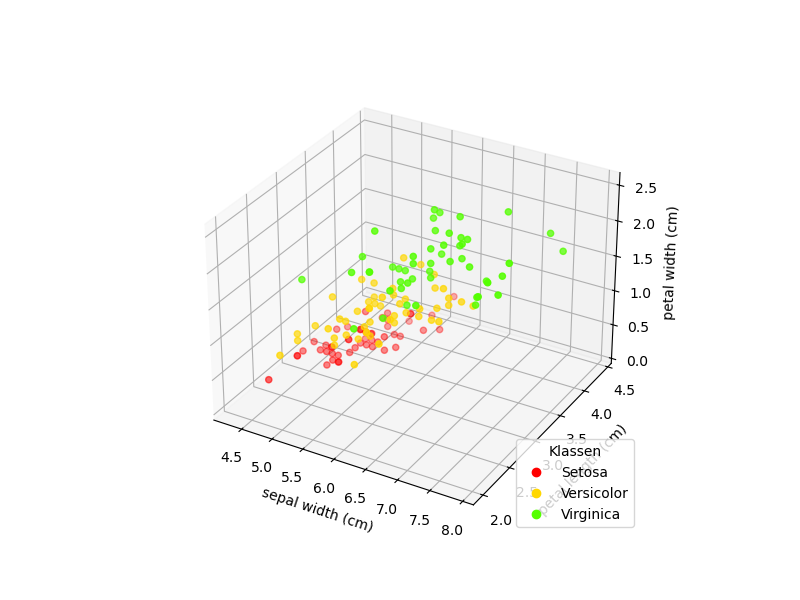

In [16]:
%matplotlib widget

plot_bunch3d(iris,1,2,3)
plt.show()